In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [63]:
df = pd.read_csv('Student_Performance.csv')

In [64]:
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             25000 non-null  int64  
 1   age                    25000 non-null  int64  
 2   gender                 25000 non-null  object 
 3   school_type            25000 non-null  object 
 4   parent_education       25000 non-null  object 
 5   study_hours            25000 non-null  float64
 6   attendance_percentage  25000 non-null  float64
 7   internet_access        25000 non-null  object 
 8   travel_time            25000 non-null  object 
 9   extra_activities       25000 non-null  object 
 10  study_method           25000 non-null  object 
 11  math_score             25000 non-null  float64
 12  science_score          25000 non-null  float64
 13  english_score          25000 non-null  float64
 14  overall_score          25000 non-null  float64
 15  fi


# Agrupando as informações gerais do Dataframe (SUMMARY)

Quantos estudantes existem no dataset?

In [66]:
df['student_id'].shape[0]

25000

Qual é a idade média dos estudantes?

In [67]:
df['age'].mean().round(1)

16.5

Qual a distribuição por género?

In [68]:
df['gender'].value_counts()

gender
other     8463
female    8290
male      8247
Name: count, dtype: int64

Qual a proporção entre escolas públicas e privadas?

In [69]:
df['school_type'].value_counts()

school_type
private    12725
public     12275
Name: count, dtype: int64

Quantos estudantes têm acesso à internet?

In [70]:
df['internet_access'].value_counts()

internet_access
yes    21227
no      3773
Name: count, dtype: int64

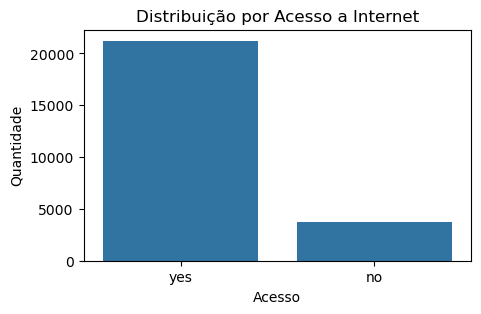

In [71]:
plt.figure(figsize=(5, 3))
sns.countplot(x='internet_access', data=df)
plt.title('Distribuição por Acesso a Internet')
plt.xlabel('Acesso')
plt.ylabel('Quantidade')
plt.show()


Qual é a média geral?

In [72]:
df['overall_score'].mean().round(1)

64.0

Qual disciplina tem a maior média? E qual tem a menor média?

In [73]:
medias = df[['math_score', 'science_score', 'english_score']].mean()

disciplina_maior = medias.idxmax()
valor_maior = round(medias.max(), 1)

disciplina_menor = medias.idxmin()
valor_menor = round(medias.min(), 1)

print(f"A disciplina com maior média é {disciplina_maior} ({valor_maior})")
print(f"A disciplina com menor média é {disciplina_menor} ({valor_menor})")


A disciplina com maior média é math_score (63.8)
A disciplina com menor média é english_score (63.7)


Qual a taxa de aprovação e reprovação (final_grade)?

<p>a, b, c = Aprovados</p>
<p>d, e, f = Reprovados</p>

In [74]:
df['final_grade'].value_counts()


final_grade
d    6311
c    6161
e    5672
f    2955
b    2696
a    1205
Name: count, dtype: int64

In [75]:
aprovados = (df['final_grade'] == 'a').sum() + (df['final_grade'] == 'b').sum() + (df['final_grade'] == 'c').sum()
reprovados = (df['final_grade'] == 'd').sum() + (df['final_grade'] == 'e').sum() + (df['final_grade'] == 'f').sum()

In [76]:
print(f"Total de alunos aprovados: {aprovados}\nTotal de Alunos reprovados: {reprovados}")

Total de alunos aprovados: 10062
Total de Alunos reprovados: 14938


<Axes: title={'center': 'Distribuição da Pauta Final'}, xlabel='Quantidade', ylabel='Classificações'>

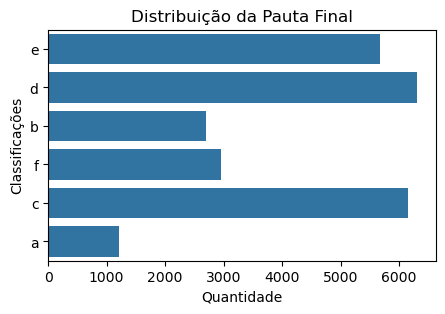

In [77]:
classificacao = df['final_grade']
plt.figure(figsize=(5, 3))
plt.title('Distribuição da Pauta Final')
plt.xlabel('Quantidade')
plt.ylabel('Classificações')
sns.countplot(classificacao )

Qual a variabilidade das notas (desvio padrão)?

In [78]:
round(df['overall_score'].std(),1)

18.9

Quantas horas de estudo por semana os estudantes dedicam, em média?

In [79]:
round(df['study_hours'].mean(), 1)

4.3

Text(0, 0.5, 'Frequência')

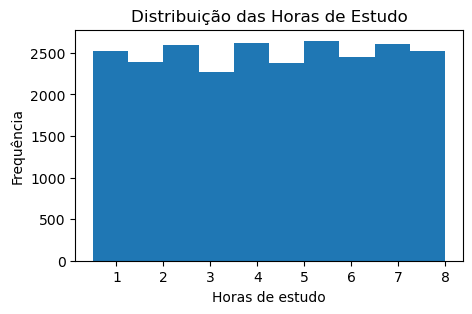

In [80]:
horas_estudo = df['study_hours']

plt.figure(figsize=(5, 3))
plt.hist(horas_estudo, bins=10)
plt.title('Distribuição das Horas de Estudo')
plt.xlabel('Horas de estudo')
plt.ylabel('Frequência')


Qual a média da taxa de presença (attendance_percentage)?

In [81]:
round(df['attendance_percentage'].mean(), 1)

75.1

Qual a distribuição dos métodos de estudo (study_method)?

In [82]:
round(df['study_method'].value_counts(normalize=True) * 100, 1)

study_method
mixed            17.4
textbook         17.0
notes            16.7
online videos    16.6
group study      16.4
coaching         16.1
Name: proportion, dtype: float64

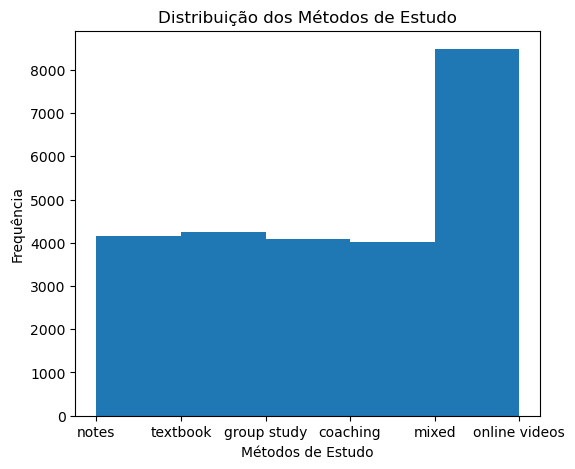

In [83]:
metodo_estudo = df['study_method']
horas_estudo = df['study_hours']
plt.figure(figsize=(6, 5))
plt.hist(metodo_estudo, bins=5)
plt.title('Distribuição dos Métodos de Estudo')
plt.xlabel('Métodos de Estudo')
plt.ylabel('Frequência')

plt.show()

Qual o tempo médio de deslocamento (travel_time)?

In [84]:
mapa_tempo = {
    '<15 min': 7.5,     # metade de 15
    '15-30 min': 22.5,  # ponto médio
    '30-60 min': 45,    # ponto médio
    '>60 min': 75       # estimativa razoável
}

In [85]:
df['travel_time_numeric'] = df['travel_time'].map(mapa_tempo)


In [86]:
media_travel_time = df['travel_time_numeric'].mean().round(1)
print(f"Tempo médio de deslocamento: {media_travel_time} minutos")


Tempo médio de deslocamento: 37.5 minutos


# Coletando os INSIGHTS

🔹 Interpretando correlação

- 0 a 0.3 → fraca influência

- 0.4 a 0.6 → média influência

- 0.7 a 1.0 → forte influência

Estudantes que estudam mais têm melhores notas?

In [87]:
round(df['study_hours'].corr(df['overall_score']), 1)

0.9

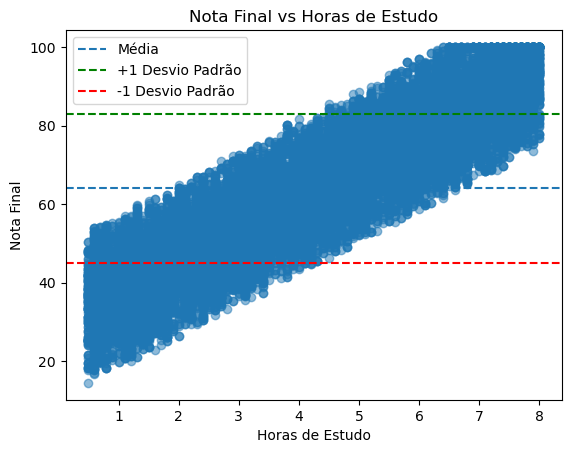

In [95]:
horas_estudo = df['study_hours']
notas = df['overall_score']

media_notas = np.mean(notas)
desvio = np.std(notas)

plt.scatter(horas_estudo, notas, alpha=0.5)
plt.axhline(media_notas, linestyle='--', label='Média')
plt.axhline(media_notas + desvio, linestyle='--', label='+1 Desvio Padrão', color='green')
plt.axhline(media_notas - desvio, linestyle='--', label='-1 Desvio Padrão', color='red')

plt.xlabel('Horas de Estudo')
plt.ylabel('Nota Final')
plt.title('Nota Final vs Horas de Estudo')
plt.legend()
plt.show()


A presença em aulas influencia a nota final?

In [ ]:
round(df['attendance_percentage'].corr(df['overall_score']), 1)

In [ ]:
assistencia_aulas = df['attendance_percentage']
notas = df['overall_score']
plt.scatter(assistencia_aulas, notas)

Estudantes com internet têm melhor desempenho?

In [ ]:
round(df.groupby('internet_access')['overall_score'].mean(), 1)


O nível de educação dos pais influencia as notas?

In [ ]:
round(df.groupby('parent_education')['overall_score'].mean(), 1)

O tempo de deslocamento afeta o rendimento académico?

In [ ]:
round(df['travel_time_numeric'].corr(df['overall_score']), 1)

Atividades extracurriculares melhoram o desempenho?

In [ ]:
round(df.groupby('extra_activities')['overall_score'].mean(), 1)

Existe diferença de desempenho entre géneros?

In [ ]:
round(df.groupby('gender')['overall_score'].mean(), 1)

Existe diferença de desempenho entre tipos de escola?

In [ ]:
round(df.groupby('school_type')['overall_score'].mean(), 1)

Qual método de estudo gera melhores resultados?

In [ ]:
best_method = df.groupby(['study_method'])[['overall_score']].mean()

In [ ]:
round(best_method.sort_values(by='overall_score', ascending=False).head(1), 1)

Quem são os 10% melhores e os 10% piores alunos?

Os 10 melhores alunos

In [89]:
df.nlargest(10 ,'overall_score')[['overall_score', 'student_id']]

,overall_score,student_id
202,100.0,203
237,100.0,238
271,100.0,272
315,100.0,316
340,100.0,341
379,100.0,380
436,100.0,437
532,100.0,533
599,100.0,600
616,100.0,617


Os 10 piores alunos

In [90]:
df.nsmallest(10 ,'overall_score')[['overall_score', 'student_id']]

,overall_score,student_id
5519,14.5,5520
12849,16.7,12850
12483,17.1,12484
5639,17.7,5640
11405,17.9,11406
22609,17.9,11406
10776,18.0,10777
21297,18.0,10777
23988,18.0,10777
4040,18.2,4041


Quais fatores mais impactam o desempenho académico?

Analisando as correlações entre diferentes fatores e a nota final, observa-se que o **tempo de estudo** é o fator com maior impacto, apresentando forte correlação positiva com a nota. O **acesso à internet** e a **frequência às aulas** também influenciam positivamente, porém em intensidade moderada. Já o **tempo de deslocamento** não apresenta impacto significativo sobre as notas, indicando que este fator não interfere diretamente no desempenho académico.


Qual disciplina exige maior intervenção pedagógica?

In [ ]:
medias = df[['math_score', 'science_score', 'english_score']].mean()
id_hard_discipline = medias.idxmin()

In [ ]:
print(f"A disciplina que que exige maior intervenção pedagógica é a disciplina de '{id_hard_discipline}' com  {round(medias.loc[id_hard_discipline], 1)} de média.")


Que recomendações podem ser feitas às escolas?

### Recomendações para as escolas

Com base nos dados analisados, as escolas devem focar em:

- **Estimular mais horas de estudo**, pois alunos que estudam mais têm notas melhores.  
- **Aumentar a presença em aula**, já que frequência ajuda, mesmo que de forma moderada.  
- **Garantir acesso à internet e recursos tecnológicos**, pois isso facilita o aprendizado.  
- **Dar atenção especial às disciplinas com notas mais baixas**, oferecendo reforço e acompanhamento.  
